**Exercise 23.1:**
Perform a network projection of this bipartite network using simple weights. The unipartite projection should only contain nodes of type 1 (|V1| = 248). How dense is the projection?

In [32]:
import networkx as nx

G = nx.read_edgelist('23_1_data.txt')
a_nodes, b_nodes = nx.bipartite.sets(G)
print(f"Set 1 has {len(a_nodes)}")
G_proj = nx.bipartite.weighted_projected_graph(G, a_nodes)
den = nx.density(G_proj)
print(f"Graph density is {den}")

Set 1 has 248
Graph density is 0.4097231291628575


**Exercise 23.3**:
Perform a network projection of the bipartite network used for Exercise 23.1 using hyperbolic weights. Draw a scatter plot comparing hyperbolic and simple weights.

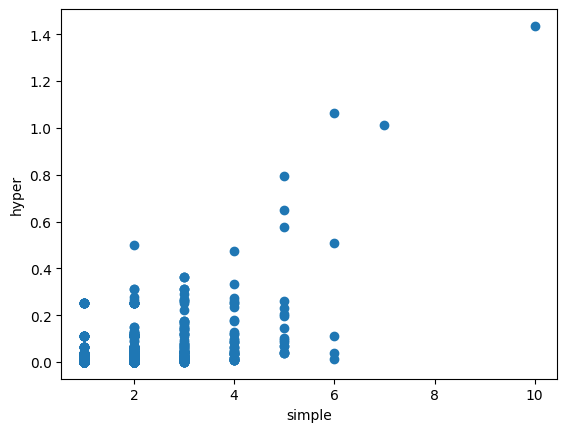

In [34]:
import matplotlib.pyplot as plt
from scipy import sparse
G_proj_simple = G_proj
# not sure if there's an nx function for hyper projections, only michele calls these things hyperbolic
# so i copied this from his stuff
def hyper(network, nodes):
   T = nx.algorithms.bipartite.matrix.biadjacency_matrix(network, row_order = nodes)
   T /= T.sum(axis = 0)
   T = sparse.csr_matrix(T)
   U = T * T.T
   U.setdiag(0)
   U.eliminate_zeros()
   G = nx.from_scipy_sparse_array(U, edge_attribute='weight')
   return nx.relabel_nodes(G, {i: nodes[i] for i in range(len(nodes))})
G_proj_hyper = hyper(G, list(a_nodes))
all_edges = set(G_proj_simple.edges) | set(G_proj_hyper.edges)

x = [G_proj_simple.edges[e]["weight"] if e in G_proj_simple.edges else 0 for e in all_edges]
y = [G_proj_hyper.edges[e]["weight"] if e in G_proj_hyper.edges else 0 for e in all_edges]

plt.scatter(x, y)
plt.xlabel('simple')
plt.ylabel('hyper')
plt.show()

**Exercise 24.1:**
Plot the CCDF edge weight distribution of this network. Calculate its average and standard deviation. NOTE: this is a directed graph!

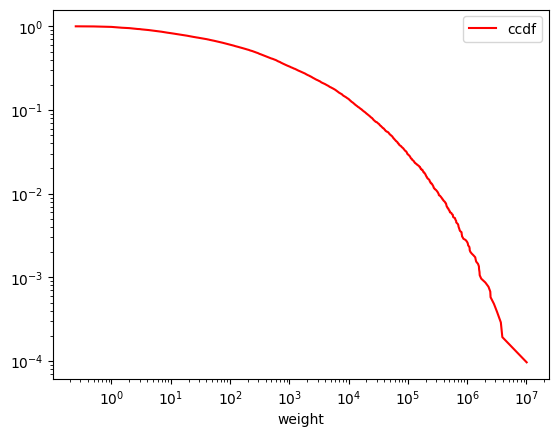

Average: 17191.33246477514, std: 149924.3809977197


In [46]:
import pandas as pd
from collections import Counter
import numpy as np

G = nx.read_edgelist('24_1_data.txt', create_using=nx.DiGraph, data=(("weight", float),))
def generate_weight_ccdf(G):
    wd = Counter(list(dict(nx.get_edge_attributes(G, "weight")).values()))
    wd = pd.DataFrame(list(wd.items()), columns=("weight", "count")).sort_values(by="weight")
    ccdf = wd.sort_values(by="weight", ascending=False)
    ccdf["cumsum"] = ccdf["count"].cumsum()
    ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
    ccdf = ccdf[["weight", "ccdf"]].sort_values(by="weight")
    return ccdf

ccdf = generate_weight_ccdf(G)
ax = plt.gca()
ccdf.plot(kind='line', x='weight', y='ccdf', color='red', loglog=True, ax=ax)
plt.show()

weights = np.array(list(dict(nx.get_edge_attributes(G, "weight")).values()))
avg_weight = np.mean(weights)
std_weight = np.std(weights)
print(f"Average: {avg_weight}, std: {std_weight}")

**Exercise 24.3:**
Can you calculate the doubly stochastic adjacency matrix of the network from Exercise 24.1? Does the calculation eventually converge? (Limit the normalization attempts to 1,000. If by 1,000 normalizations you don't have a doubly stochastic matrix, the calculation didn't converge)

In [54]:
G = nx.read_edgelist('24_1_data.txt', data=[("weight", float),], create_using=nx.DiGraph())
A = nx.to_numpy_array(G)
attempts = 0
while np.std(A.sum(axis = 1)) > 1e-12:
   A /= A.sum(axis = 1)
   A /= A.sum(axis = 0)
   attempts += 1
   if attempts > 1000:
      raise Exception("Calculation didn't converge. The matrix cannot be made doubly stochastic. Aborting.")
      break

print("Calculation converged. Here's A:")
print(A)

# there it is
# also dont wanna do anymore

Exception: Calculation didn't converge. The matrix cannot be made doubly stochastic. Aborting.